# COMP 6934 - Assignment 7


Name: Mohammad Shehabul Islam

ID: 202196528

# Question 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import geopandas as gpd
import folium
import seaborn as sns

C:\Anaconda3\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


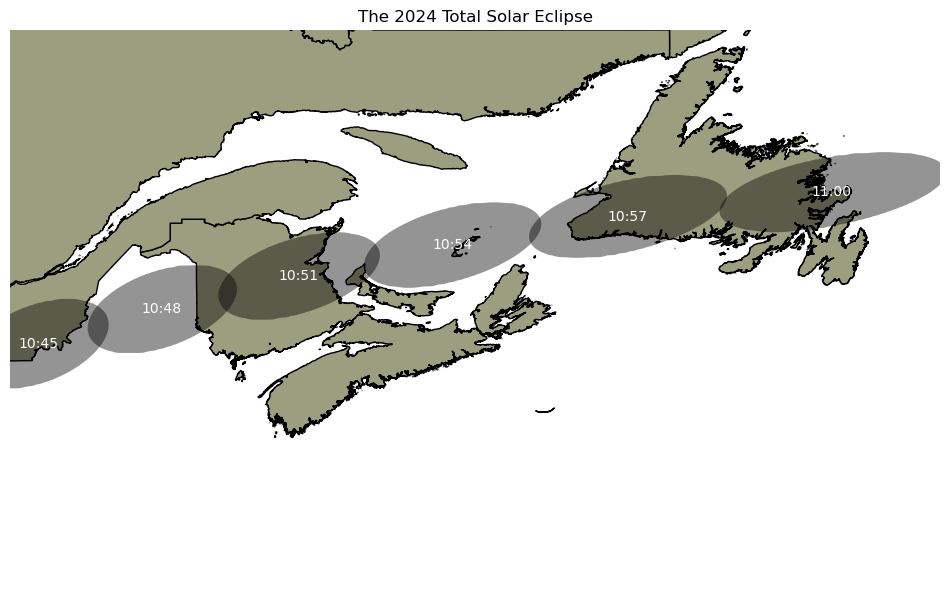

In [149]:
umbra_path = gpd.read_file('umbra_lo.shp').to_crs(epsg=4326)
canada_map = gpd.read_file('canada.shp').to_crs(epsg=4326)
umbra_filtered = umbra_path[umbra_path['UTCSec'] % 180 == 0]

eclipse_start_time = datetime(2024, 4, 8, 15, 15)
umbra_filtered['Timestamp'] = umbra_filtered['UTCSec'].apply(lambda x: eclipse_start_time + timedelta(seconds=x))

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_xlim(-72, -51)
ax.set_ylim(40, 52)

canada_map.plot(ax=ax, color='#9b9e7f', edgecolor='black')

umbra_filtered.plot(ax=ax, color='black', alpha=0.42)

for _, row in umbra_filtered.iterrows():
    plt.annotate(text=row['Timestamp'].strftime('%H:%M'), 
                 xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                 color='white', ha='center', va='center')


ax.set_axis_off()
ax.set_title('The 2024 Total Solar Eclipse')

plt.show()

# Question 2

In [107]:
umbra_path = gpd.read_file('umbra_lo.shp')
umbra_path = umbra_path.to_crs(epsg=4326)

umbra_filtered = umbra_path[umbra_path['UTCSec'] % 180 == 0]
out_map = folium.Map(location=[55, -60], zoom_start=5, tiles='ESRI WorldTopoMap')
umbra_geojson = umbra_filtered.to_json()

folium.GeoJson(
    umbra_geojson,
    style_function=lambda feature:{
        'fillColor': 'grey',
        'color': 'grey',
        'weight': 1,
        'fillOpacity': 0.1
    }
).add_to(out_map)

out_map.save('Answer 2.html')
out_map